In [10]:
from transformers import MarianMTModel, MarianTokenizer
import torch
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

model_name = "Helsinki-NLP/opus-mt-ja-en"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)
src_text = "これはテストです"
tgt_text = "This is a test."


c:\Users\Matt\anaconda3\envs\cuda\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [11]:
# Tokenize source
inputs = tokenizer(src_text, return_tensors="pt")

# Tokenize target for decoder input
with tokenizer.as_target_tokenizer():
    decoder_inputs = tokenizer(tgt_text, return_tensors="pt")

# Forward pass with attention
outputs = model(**inputs, decoder_input_ids=decoder_inputs["input_ids"], output_attentions=True)

# Extract and average cross-attention
cross_attn = torch.stack(outputs.cross_attentions)  # (num_layers, batch, heads, tgt_len, src_len)
avg_attn = cross_attn.mean(dim=(0, 2)).squeeze()     # average over layers & heads

# Get token labels
src_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tgt_tokens = tokenizer.convert_ids_to_tokens(decoder_inputs["input_ids"][0])



c:\Users\Matt\anaconda3\envs\cuda\Lib\site-packages\transformers\tokenization_utils_base.py:3970: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


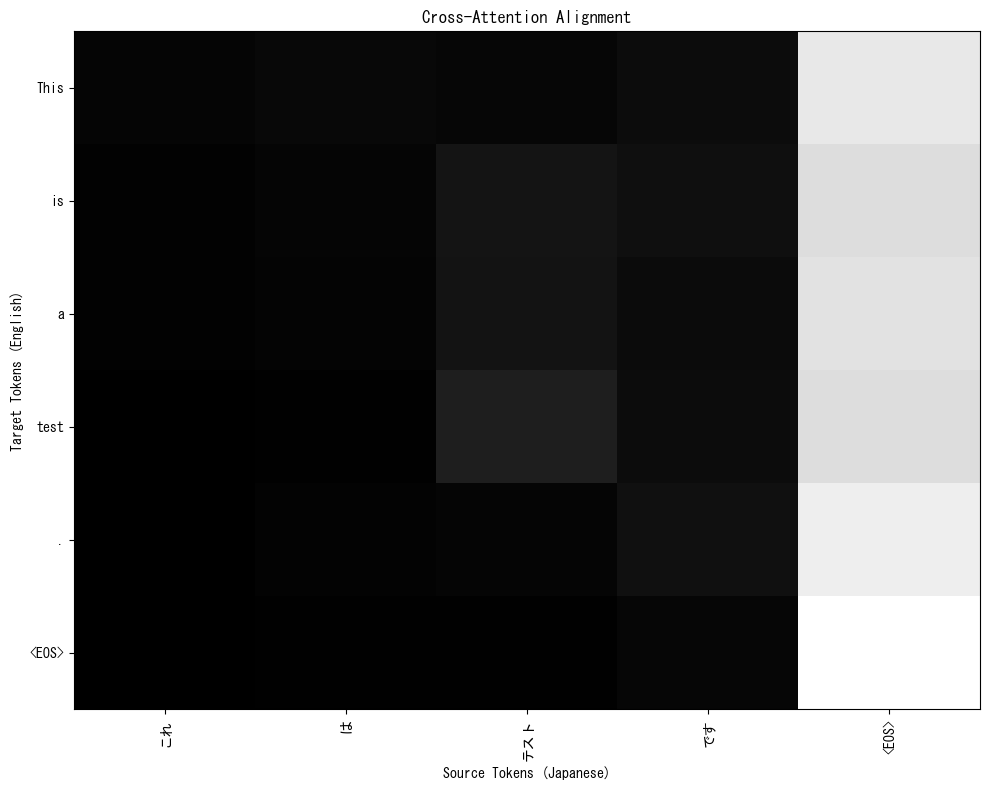

In [ ]:
# Process tokens for better readability
def clean_tokens(tokens):
    return [token.replace('▁', '').replace('</s>', '<EOS>') for token in tokens]

src_tokens = clean_tokens(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]))
tgt_tokens = clean_tokens(tokenizer.convert_ids_to_tokens(decoder_inputs["input_ids"][0]))

# Plot
plt.figure(figsize=(10, 8))
plt.imshow(avg_attn.detach().cpu().numpy(), cmap='verdis', aspect='auto')
plt.xticks(range(len(src_tokens)), src_tokens, rotation=90)
plt.yticks(range(len(tgt_tokens)), tgt_tokens)
plt.xlabel("Source Tokens (Japanese)")
plt.ylabel("Target Tokens (English)")
plt.title("Cross-Attention Alignment")
plt.tight_layout()
plt.show()
